In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")
loan=pd.read_csv('../input/lending-club-loan-data-set/loan.csv')
loan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
35473,435289,520047,6000,6000,6000.000000,36 months,17.04%,214.05,E,E3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7254,884267,1099625,10700,10700,10700.000000,36 months,14.27%,367.11,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39672,117249,116607,5000,5000,1300.000000,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
15346,748913,948052,6000,6000,6000.000000,36 months,14.79%,207.38,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
21164,646959,827743,7000,7000,7000.000000,60 months,15.57%,168.64,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9808,842961,1053669,3500,3500,3500.000000,60 months,18.39%,89.63,E,E2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
14727,761540,962007,2000,2000,2000.000000,36 months,10.99%,65.47,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
29317,523313,677053,9000,9000,8834.960149,60 months,11.86%,199.57,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
34863,445199,543489,17000,17000,17000.000000,36 months,12.53%,568.93,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
23221,617056,791139,9500,9500,9400.000000,60 months,16.32%,232.64,E,E2,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# checking the null value in term of percentages for each columns
((loan.isnull().sum()/len(loan))*100).sort_values(ascending= False).head(60)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [6]:
# checking the columns having more than 90% null values.
loan.columns[loan.apply(lambda loan:(loan.isnull().sum()/len(loan))*100>=90)]

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
# Dropping the columns with more than 90% null values
loan=loan.drop(loan.columns[loan.apply(lambda loan:(loan.isnull().sum()/len(loan))*100>=90)],axis=1)
loan.shape

(39717, 55)

In [8]:
((loan.isnull().sum()/len(loan))*100).sort_values(ascending= False)

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_acc                      0.000000
total_pymnt_inv                0.000000
recoveries                     0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
pub_rec                        0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000


***Now we will check the impact of each feature with respect to loan_status (Target Variable)***


In [9]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

***As we can't predict the result of Current brrower loan status whether they will end up
with fully paid or charged off so we can drop the records related to it.***

In [10]:
loan=loan[loan['loan_status']!='Current']
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [11]:
# Dropping the columns which are associated with current status of Loan of the applicant.
loan=loan.drop(['installment','last_pymnt_d','revol_util','earliest_cr_line', 'total_pymnt', 'last_pymnt_amnt',
       'last_credit_pull_d',],axis=1)
loan.shape

(38577, 48)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

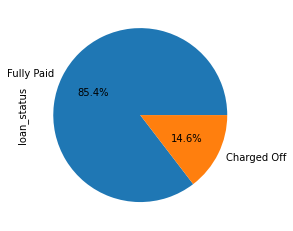

In [13]:
# Checking the distribution ratio of Loan status attributes.
loan['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [14]:
loan.shape

(38577, 48)

In [15]:
((loan.isnull().sum()/len(loan))*100).sort_values(ascending= False)

mths_since_last_delinq        64.559193
desc                          32.472717
emp_title                      6.185033
emp_length                     2.677761
pub_rec_bankruptcies           1.806776
chargeoff_within_12_mths       0.145164
collections_12_mths_ex_med     0.145164
tax_liens                      0.101097
title                          0.028514
total_pymnt_inv                0.000000
pub_rec                        0.000000
revol_bal                      0.000000
total_acc                      0.000000
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_rec_late_fee             0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
policy_code                    0.000000
application_type               0.000000
acc_now_delinq                 0.000000
delinq_amnt                    0.000000


##### Undersatnding the Feature 'mths_since_last_delinq'

mths_since_last_delinq: The number of months since the borrower's last delinquency.

In [16]:
loan['mths_since_last_delinq'].dtype

dtype('float64')

In [17]:
loan['mths_since_last_delinq'].describe()

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [18]:
loan['mths_since_last_delinq'].sample(10)

29166    56.0
33595     NaN
31462     NaN
12268    30.0
15389     NaN
25377    12.0
9083     69.0
8149      NaN
33036     NaN
34166     NaN
Name: mths_since_last_delinq, dtype: float64

In [19]:
loan['mths_since_last_delinq'].nunique()

95

In [20]:
loan.groupby(['loan_status'])['mths_since_last_delinq'].count()

loan_status
Charged Off     2142
Fully Paid     11530
Name: mths_since_last_delinq, dtype: int64

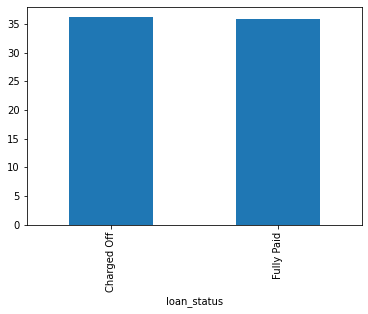

In [21]:
loan.groupby(['loan_status'])['mths_since_last_delinq'].mean().plot.bar()
plt.show()

In [22]:
loan.groupby(['loan_status'])['mths_since_last_delinq'].count()

loan_status
Charged Off     2142
Fully Paid     11530
Name: mths_since_last_delinq, dtype: int64

In [23]:
100*loan.groupby(['loan_status'])['mths_since_last_delinq'].count()/loan['mths_since_last_delinq'].count()

loan_status
Charged Off    15.667057
Fully Paid     84.332943
Name: mths_since_last_delinq, dtype: float64

> #### As the effect of mths_since_last_delinq is almost negligible on the loan status column hence we can drop it.

In [24]:
#Dropping the coloumn mths_since_last_delinq
loan= loan.drop('mths_since_last_delinq',axis=1)
loan.shape

(38577, 47)

#### Understanding the feature desc
desc: loan description provided by the borrower

In [25]:
loan['desc'].sample(10)

20977                                                  NaN
8854                                                   NaN
20000      Borrower added on 02/01/11 > This is to pay ...
1079       Borrower added on 12/05/11 > Loan<br><br> Bo...
36536    I have some expenses for applying to the Unive...
20627      Borrower added on 01/17/11 > I wanted to add...
10045      Borrower added on 08/03/11 > Basic consolida...
32353    If I am approved help me get a head of some bi...
37567    The purpose of this loan is to reinvest in Len...
3362       Borrower added on 11/10/11 > Have 2 credit c...
Name: desc, dtype: object

In [26]:
loan['desc'].dtype

dtype('O')

In [27]:
loan['desc'].value_counts()

In [28]:
loan['desc'].describe()

count     26050
unique    25803
top            
freq        209
Name: desc, dtype: object

In [29]:
(loan['desc'].describe()[1]/loan['desc'].describe()[0])*100

99.0518234165067

> #### As 99% loan Description are unique and hence it can't be a influencing feature in loan approval process

In [30]:
loan = loan.drop('desc',axis=1)
loan.shape

(38577, 46)

#### Understanding emp_title
emp_title :The job title supplied by the Borrower when applying for the loan.

In [31]:
loan['emp_title'].sample(10)

5722                City of Rock Island
21217                 Tech Credit Union
12809        Guy Conti Art & Design Inc
22268                               NaN
27910              HJ High Construction
21846            Silicon Graphics - SGI
24964             INSTAP Academic Press
30179                         WellPoint
17565    Cornerstone Physician Staffing
3344                             HP/EDS
Name: emp_title, dtype: object

In [32]:
loan['emp_title'].value_counts()

US Army                          131
Bank of America                  107
IBM                               65
AT&T                              57
Kaiser Permanente                 56
                                ... 
rudin managment                    1
Education Technology Services      1
Mojave Electric                    1
Yamato Restaurant                  1
KRK Holdings, Inc                  1
Name: emp_title, Length: 28027, dtype: int64

In [33]:
loan['emp_title'].describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

In [34]:
loan.groupby(['loan_status'])['emp_title'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5143,4636,Bank of America,20
Fully Paid,31048,24209,US Army,113


> #### As there are 28K+ unique values out of 36K+ and there is no significant impact by any specific employment title. Hence it can't be an influential feature in the loan approval process.

In [35]:
loan=loan.drop('emp_title', axis=1)
loan.shape

(38577, 45)

In [36]:
((loan.isnull().sum()/len(loan))*100).sort_values(ascending= False)

emp_length                    2.677761
pub_rec_bankruptcies          1.806776
chargeoff_within_12_mths      0.145164
collections_12_mths_ex_med    0.145164
tax_liens                     0.101097
title                         0.028514
total_rec_prncp               0.000000
revol_bal                     0.000000
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt_inv               0.000000
recoveries                    0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
open_acc                      0.000000
collection_recovery_fee       0.000000
policy_code                   0.000000
application_type              0.000000
acc_now_delinq                0.000000
delinq_amnt                   0.000000
pub_rec                       0.000000
id                            0.000000
inq_last_6mths                0.000000
annual_inc               

#### understanding emp_length feature
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [37]:
loan.groupby(['loan_status'])['emp_length'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5399,11,10+ years,1331
Fully Paid,32145,11,10+ years,7157


In [38]:
loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

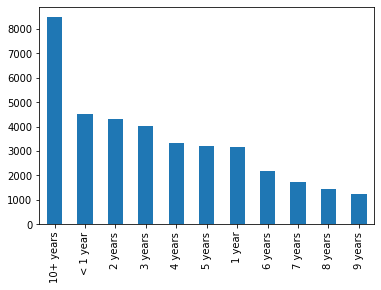

In [39]:
loan['emp_length'].value_counts().plot.bar()
plt.show()

In [40]:
len(loan['loan_status'])

38577

In [41]:
(loan.groupby(['loan_status'])['emp_length'].value_counts()/loan.groupby(['emp_length'])['loan_status'].count())*100

loan_status  emp_length
Charged Off  10+ years     15.680961
             < 1 year      14.174800
             2 years       13.213703
             3 years       13.833500
             4 years       13.824057
             5 years       14.339386
             1 year        14.389397
             6 years       14.160517
             7 years       15.371128
             8 years       14.146341
             9 years       12.887439
Fully Paid   10+ years     84.319039
             < 1 year      85.825200
             2 years       86.786297
             3 years       86.166500
             4 years       86.175943
             5 years       85.660614
             1 year        85.610603
             6 years       85.839483
             7 years       84.628872
             8 years       85.853659
             9 years       87.112561
dtype: float64

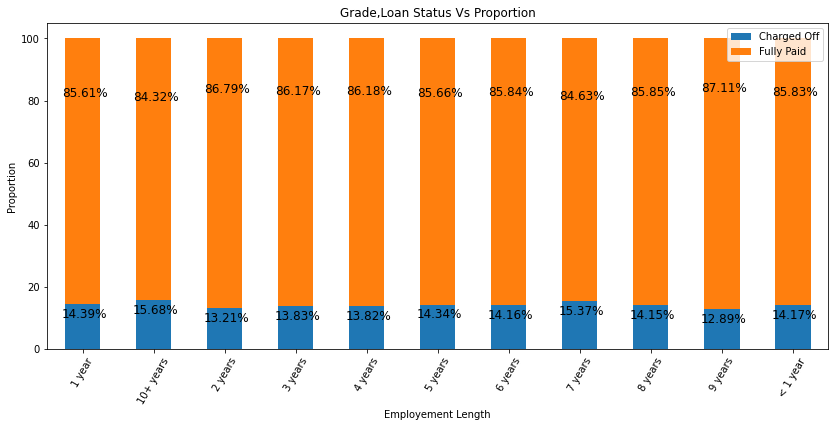

In [123]:
plots=loan.groupby('emp_length')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(14,6))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(2, -10),
                       textcoords='offset points')
plt.xticks(rotation=60)
plt.ylabel("Proportion")
plt.legend(loc='upper right')
plt.title("Grade,Loan Status Vs Proportion")
plt.xlabel('Employement Length')
plt.show()

* #### As we can see the Employment length having 10+ Years are more likely to Charged off. Hence Lending club should examine carefully before approving the Loan to them.


In [43]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  issue_d                     385

In [44]:
# Checking the correlation between numricals features to get more insights
loan.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.005572,0.091785,-0.008417,-0.041021,0.016256,...,-0.055789,0.038686,-0.010916,NaN,NaN,NaN,NaN,NaN,-0.007997,NaN
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.006442,0.092910,-0.007905,-0.045879,0.013804,...,-0.058497,0.036526,-0.012831,NaN,NaN,NaN,NaN,NaN,-0.007346,NaN
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.268999,0.062436,-0.031951,0.012940,0.177200,...,0.047103,0.142789,0.077005,NaN,NaN,NaN,NaN,NaN,-0.035981,NaN
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.264798,0.062194,-0.031866,0.012857,0.175682,...,0.049465,0.143452,0.078769,NaN,NaN,NaN,NaN,NaN,-0.036995,NaN
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.251981,0.070663,-0.038171,-0.002800,0.162738,...,0.029379,0.130997,0.064282,NaN,NaN,NaN,NaN,NaN,-0.041193,NaN
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,1.000000,-0.121530,0.022229,0.035465,0.156927,...,0.006814,0.022184,0.015981,NaN,NaN,NaN,NaN,NaN,-0.016224,NaN
dti,0.091785,0.092910,0.062436,0.062194,0.070663,-0.121530,1.000000,-0.033347,0.002178,0.287849,...,-0.011412,0.026162,0.011744,NaN,NaN,NaN,NaN,NaN,0.005966,NaN
delinq_2yrs,-0.008417,-0.007905,-0.031951,-0.031866,-0.038171,0.022229,-0.033347,1.000000,0.008733,0.011649,...,0.028772,0.012443,0.014077,NaN,NaN,NaN,NaN,NaN,0.003404,NaN
inq_last_6mths,-0.041021,-0.045879,0.012940,0.012857,-0.002800,0.035465,0.002178,0.008733,1.000000,0.093434,...,0.030741,0.018899,0.012388,NaN,NaN,NaN,NaN,NaN,0.015517,NaN
open_acc,0.016256,0.013804,0.177200,0.175682,0.162738,0.156927,0.287849,0.011649,0.093434,1.000000,...,-0.018827,0.017241,0.006674,NaN,NaN,NaN,NaN,NaN,0.005803,NaN


In [45]:
# From the above correlation matrix, we could observe few NaN as the correlation result between numerical features.
# Understanding one of the numerical feature having NaN as a correlation result.
loan['collections_12_mths_ex_med'].describe()

count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

> #### We could obsere that for the column 'collections_12_mths_ex_med', all the entries are 0 and hence the correlation is NaN.

> #### Now verfying further for such features.

In [46]:
# Accessing the Numerical columns from the Loan Dataset
loan_Numerical=loan.select_dtypes(include=np.number)
loan_Numerical.shape

(38577, 28)

In [47]:
# Accessing all such numericals columns having sum of all entries as 0.
loan_Numerical.columns[loan_Numerical.apply(lambda loan: loan.sum()==0)]

Index(['out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [48]:
# Dropping such numerical columns from loan Dataset
loan=loan.drop(['out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],axis=1)
loan.shape

(38577, 38)

In [49]:
# Checking the correlation between remaining numerical columns
loan.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_bal,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,pub_rec_bankruptcies
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.005572,0.091785,-0.008417,-0.041021,0.016256,...,0.001357,0.039902,0.194832,0.092979,0.123268,-0.055789,0.038686,-0.010916,NaN,-0.007997
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.006442,0.092910,-0.007905,-0.045879,0.013804,...,-0.001983,0.042217,0.205195,0.093773,0.126660,-0.058497,0.036526,-0.012831,NaN,-0.007346
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.268999,0.062436,-0.031951,0.012940,0.177200,...,0.314022,0.256179,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,NaN,-0.035981
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.264798,0.062194,-0.031866,0.012857,0.175682,...,0.306501,0.250551,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,NaN,-0.036995
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.251981,0.070663,-0.038171,-0.002800,0.162738,...,0.286265,0.242715,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,NaN,-0.041193
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,1.000000,-0.121530,0.022229,0.035465,0.156927,...,0.277374,0.234534,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,NaN,-0.016224
dti,0.091785,0.092910,0.062436,0.062194,0.070663,-0.121530,1.000000,-0.033347,0.002178,0.287849,...,0.228090,0.229119,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,NaN,0.005966
delinq_2yrs,-0.008417,-0.007905,-0.031951,-0.031866,-0.038171,0.022229,-0.033347,1.000000,0.008733,0.011649,...,-0.054437,0.066994,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,NaN,0.003404
inq_last_6mths,-0.041021,-0.045879,0.012940,0.012857,-0.002800,0.035465,0.002178,0.008733,1.000000,0.093434,...,-0.020787,0.113516,-0.018589,-0.021328,0.026549,0.030741,0.018899,0.012388,NaN,0.015517
open_acc,0.016256,0.013804,0.177200,0.175682,0.162738,0.156927,0.287849,0.011649,0.093434,1.000000,...,0.288055,0.687260,0.152008,0.159997,0.123478,-0.018827,0.017241,0.006674,NaN,0.005803


In [50]:
#From the above correlation we could observe NaN for the 'policy_code' feature. Hence verifying further to know the reason behind.
loan['policy_code'].describe()

count    38577.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [51]:
loan['policy_code'].value_counts()

1    38577
Name: policy_code, dtype: int64

> #### As all values of policy code are 1 and it doesn't have any impact on loan approval process. Hence dropping the column.

In [52]:
loan= loan.drop('policy_code',axis=1)
loan.shape

(38577, 37)

<AxesSubplot:>

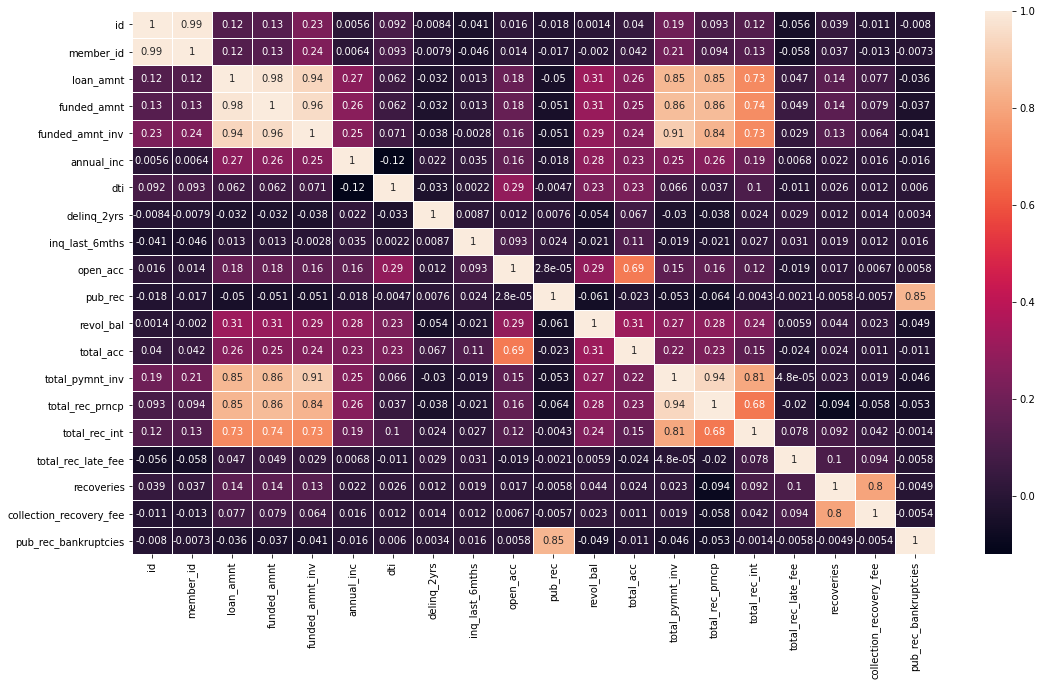

In [53]:
# Checking the corrleation using heatmap for more insights
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(loan.corr(), annot=True, linewidth=0.5)

> #### Features such as 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' are Highly correlated so any one of the Feature can be chosen.
> #### Similarly, Features such as total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int' are Highly correlated anyone can be chosen.

In [54]:
loan=loan.drop(['funded_amnt','funded_amnt_inv','total_pymnt_inv', 'total_rec_prncp','total_rec_int'],axis=1)
loan.shape

(38577, 32)

In [55]:
loan_Numerical.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [56]:
# Dropping the columns which are irrelevant from business point of view as thease are not having significant impact in the Loan Approval Process.
loan=loan.drop(['id', 'member_id', 'delinq_2yrs', 'inq_last_6mths','open_acc', 'pub_rec', 'revol_bal', 
                'total_acc', 'total_rec_late_fee', 'recoveries','collection_recovery_fee',
                 'pub_rec_bankruptcies'],axis=1)
loan.shape

(38577, 20)

In [57]:
loan.sample(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,initial_list_status,application_type
1417,7000,36 months,6.62%,A,A2,9 years,MORTGAGE,96000.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,bailout loan,928xx,CA,5.89,f,INDIVIDUAL
14189,7150,36 months,15.99%,D,D2,10+ years,RENT,64500.0,Not Verified,May-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Balance Loan,076xx,NJ,23.81,f,INDIVIDUAL
29815,14400,60 months,16.45%,E,E1,2 years,RENT,32400.0,Source Verified,May-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit Card Refinancing,914xx,CA,14.78,f,INDIVIDUAL
29762,1800,36 months,13.48%,C,C3,6 years,OWN,45600.0,Not Verified,May-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,New House Stuff,333xx,FL,3.95,f,INDIVIDUAL
710,5000,36 months,11.71%,B,B3,10+ years,OWN,35000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other Loan,400xx,KY,19.37,f,INDIVIDUAL
38126,20000,36 months,10.51%,B,B2,5 years,MORTGAGE,150000.0,Source Verified,Dec-08,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Kitchen remodel,950xx,CA,2.92,f,INDIVIDUAL
24070,15000,60 months,17.80%,F,F1,3 years,RENT,64000.0,Verified,Nov-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Business,076xx,NJ,0.38,f,INDIVIDUAL
23837,9775,36 months,6.91%,A,A5,1 year,MORTGAGE,38220.0,Source Verified,Nov-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,BACK IN BLACK,021xx,MA,7.63,f,INDIVIDUAL
31736,10000,36 months,15.70%,D,D4,3 years,MORTGAGE,68500.0,Not Verified,Mar-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Finish Paying off Dept in 2010,021xx,MA,19.15,f,INDIVIDUAL
10407,4800,36 months,13.49%,C,C2,< 1 year,RENT,21600.0,Source Verified,Aug-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,919xx,CA,11.50,f,INDIVIDUAL


In [58]:
loan['initial_list_status'].value_counts()

f    38577
Name: initial_list_status, dtype: int64

> #### As all values of initial_list_status are 'F' and it doesn't seems to have any impact in the loan approval process. 

In [59]:
loan=loan.drop('initial_list_status',axis=1)
loan.shape

(38577, 19)

In [60]:
loan['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [61]:
loan=loan.drop('application_type',axis=1)
loan.shape

(38577, 18)

In [62]:
loan[['zip_code','addr_state']].describe()

,zip_code,addr_state
count,38577,38577
unique,822,50
top,100xx,CA
freq,583,6949


> #### We can drop the feature 'zip_code' and 'addr_state', because address of borrower can't be a deciding factor in the loan approval process.

In [63]:
loan=loan.drop(['zip_code','addr_state'], axis=1)
loan.shape

(38577, 16)

In [64]:
# Understanding the 'purpose' feature
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [65]:
100*(loan.groupby(['purpose'])['loan_status'].value_counts(normalize=True)).sort_values(ascending=False)

purpose             loan_status
major_purchase      Fully Paid     89.674419
wedding             Fully Paid     89.632829
car                 Fully Paid     89.326217
credit_card         Fully Paid     89.218222
home_improvement    Fully Paid     87.930435
vacation            Fully Paid     85.866667
debt_consolidation  Fully Paid     84.674605
medical             Fully Paid     84.434655
moving              Fully Paid     84.027778
house               Fully Paid     83.923706
other               Fully Paid     83.622251
educational         Fully Paid     82.769231
renewable_energy    Fully Paid     81.372549
small_business      Fully Paid     72.919042
                    Charged Off    27.080958
renewable_energy    Charged Off    18.627451
educational         Charged Off    17.230769
other               Charged Off    16.377749
house               Charged Off    16.076294
moving              Charged Off    15.972222
medical             Charged Off    15.565345
debt_consolidation  Cha

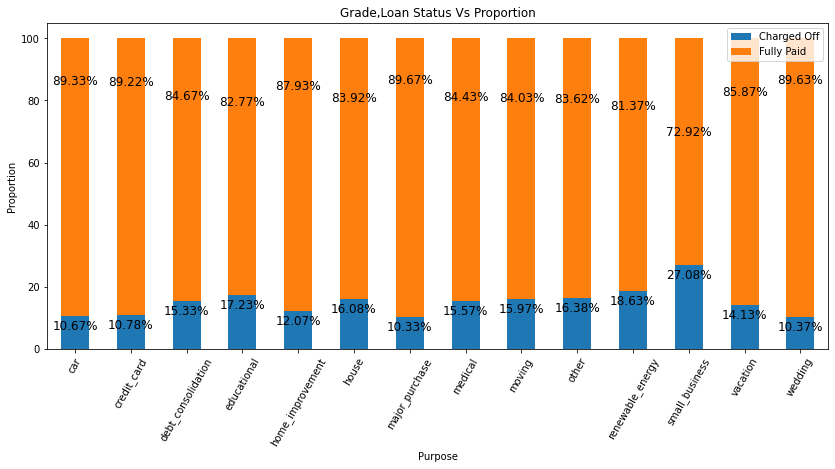

In [120]:
plots=loan.groupby('purpose')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(14,6))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=60)
plt.ylabel("Proportion")
plt.legend(loc='upper right')
plt.title("Grade,Loan Status Vs Proportion")
plt.xlabel('Purpose')
plt.show()

* #### Purpose is important Feature as we can see borrower having purpose (89.67%) of major purchase are more likely to Fully Pay and purose of small business (27%) are most like to Charged Off. Hence Lending Club sould carefully examine before issuing loan to the Small Business.

In [67]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'dti'],
      dtype='object')

In [68]:
# Understanding the Feature 'term'
# term:The number of payments on the loan. Values are in months and can be either 36 or 60.
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [69]:
loan.groupby(['term'])['loan_status'].value_counts()

term        loan_status
 36 months  Fully Paid     25869
            Charged Off     3227
 60 months  Fully Paid      7081
            Charged Off     2400
Name: loan_status, dtype: int64

In [70]:
(loan.groupby(['term'])['loan_status'].value_counts(normalize=True))*100

term        loan_status
 36 months  Fully Paid     88.909128
            Charged Off    11.090872
 60 months  Fully Paid     74.686215
            Charged Off    25.313785
Name: loan_status, dtype: float64

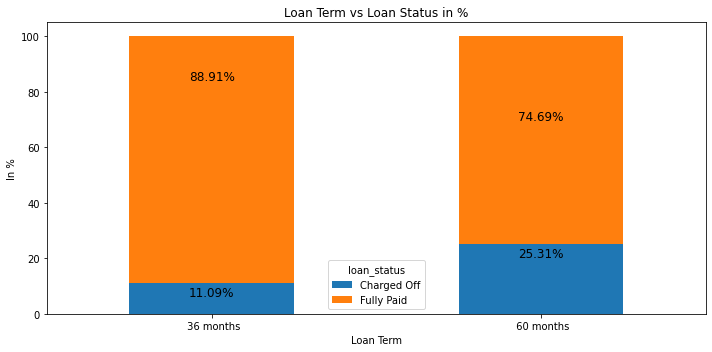

In [71]:
plots=loan.groupby('term')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Loan Term')
plt.ylabel('In %')
plt.title('Loan Term vs Loan Status in %')
plt.tight_layout()



* #### Borrowers with 3 Years tenure are most likely to Fully Pay where as Borrowers with 5 Years tenure are most likely to Charged off

In [72]:
# Undersatnding the feature 'int_rate'
# int_rate: Interest Rate on the loan
loan['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.20%      1
20.52%      1
16.71%      1
18.36%      1
16.15%      1
Name: int_rate, Length: 370, dtype: int64

In [73]:
# Removing the % interest rate entries in order to convert them into the numerical values for univariant analysis
loan['int_rate']=loan['int_rate'].apply(lambda x:float(x.strip('%')))
loan['int_rate'].head()                                 

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

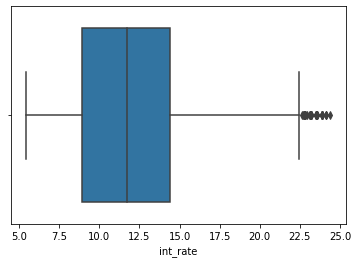

In [74]:
sns.boxplot(loan['int_rate'])
plt.show()

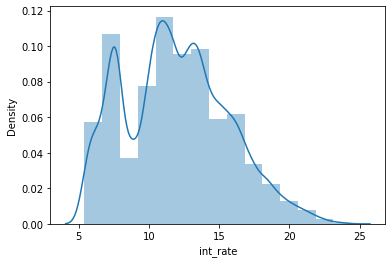

In [75]:
sns.distplot(loan['int_rate'],bins=15)
plt.show()

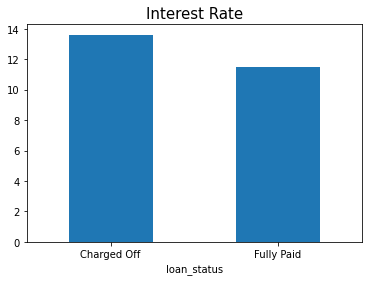

In [76]:
# As we could see the presence of outliers, we are using median plot.
loan.groupby(['loan_status'])['int_rate'].median().plot.bar(rot=0)
plt.title('Interest Rate', fontsize=15)

plt.show()

* #### The column int_rate is an influential feature in the approval of loan process as the analysis clearly shows that interest rate below 12% are most likely to Fully Pay where as interest rate above 12% are most like to Charged off.


In [77]:
# Understanding the Feature 'grade'
# grade:LC assigned loan grade
loan.grade.head()

0    B
1    C
2    C
3    C
5    A
Name: grade, dtype: object

In [78]:
100*(loan.groupby(['grade'])['loan_status'].value_counts(normalize=True)).sort_values(ascending=False)

grade  loan_status
A      Fully Paid     94.006969
B      Fully Paid     87.794433
C      Fully Paid     82.805719
D      Fully Paid     78.013766
E      Fully Paid     73.150582
F      Fully Paid     67.315574
G      Fully Paid     66.220736
       Charged Off    33.779264
F      Charged Off    32.684426
E      Charged Off    26.849418
D      Charged Off    21.986234
C      Charged Off    17.194281
B      Charged Off    12.205567
A      Charged Off     5.993031
Name: loan_status, dtype: float64

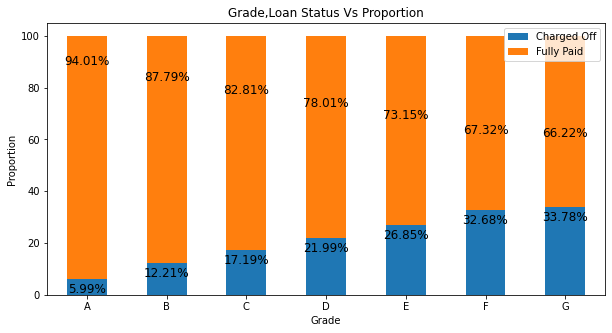

In [80]:
plots=loan.groupby('grade')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=0)
plt.ylabel("Proportion")
plt.legend(loc='upper right')
plt.title("Grade,Loan Status Vs Proportion")
plt.xlabel('Grade')
plt.show()

* #### Grade is having singnificant impact on Loan Approval Process. Higher the Grade are more likely to Fully Pay and lower the Grade are more likely to Charged Off (A>B>C>D>E>F>G).

In [81]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'dti'],
      dtype='object')

> #### As all the applicant are using same leanding club url for the loan hence the feature 'url' don't have any impact on Loan approval process.

In [82]:
loan=loan.drop(['url'],axis=1)

In [83]:
#  Understanding sub_grade Feature
loan['sub_grade'].head()

0    B2
1    C4
2    C5
3    C1
5    A4
Name: sub_grade, dtype: object

In [84]:
100*(loan.groupby(['sub_grade'])['loan_status'].value_counts(normalize=True)).sort_values(ascending=False)

sub_grade  loan_status
A1         Fully Paid     97.366111
A2         Fully Paid     95.092838
A3         Fully Paid     94.309392
A4         Fully Paid     93.804386
A5         Fully Paid     92.007366
                            ...    
           Charged Off     7.992634
A4         Charged Off     6.195614
A3         Charged Off     5.690608
A2         Charged Off     4.907162
A1         Charged Off     2.633889
Name: loan_status, Length: 70, dtype: float64

> #### sub_grade column is having similar behaviour compared to Grade Feature. so we can drop the sub_grade column to reduce the redundancy.

In [85]:
loan=loan.drop('sub_grade',axis=1)
loan.shape

(38577, 14)

In [86]:
# Understanding the Feature 'home_ownership' 
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [87]:
loan.groupby(['home_ownership'])['loan_status'].value_counts()

home_ownership  loan_status
MORTGAGE        Fully Paid     14694
                Charged Off     2327
NONE            Fully Paid         3
OTHER           Fully Paid        80
                Charged Off       18
OWN             Fully Paid      2532
                Charged Off      443
RENT            Fully Paid     15641
                Charged Off     2839
Name: loan_status, dtype: int64

In [88]:
(loan.groupby(['home_ownership'])['loan_status'].value_counts(normalize=True))*100

home_ownership  loan_status
MORTGAGE        Fully Paid      86.328653
                Charged Off     13.671347
NONE            Fully Paid     100.000000
OTHER           Fully Paid      81.632653
                Charged Off     18.367347
OWN             Fully Paid      85.109244
                Charged Off     14.890756
RENT            Fully Paid      84.637446
                Charged Off     15.362554
Name: loan_status, dtype: float64

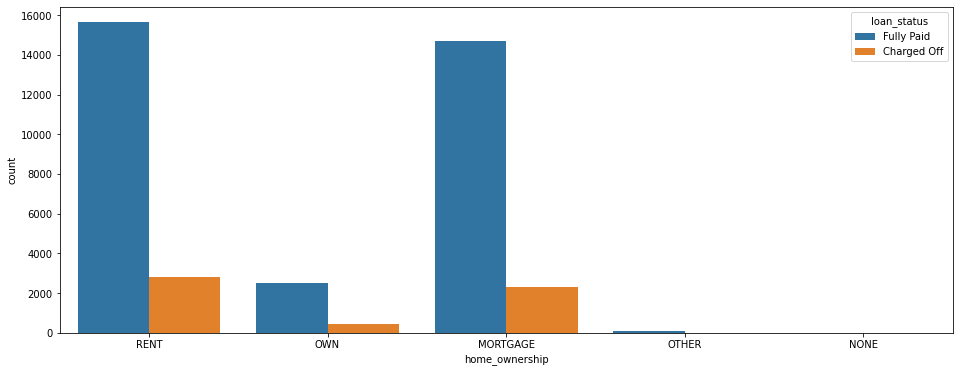

In [89]:
plt.figure(figsize=(16,6))
sns.countplot(x ='home_ownership', data = loan, hue='loan_status')
plt.show()

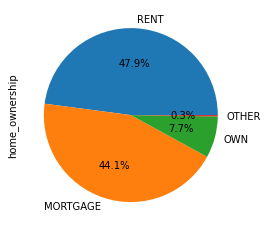

In [112]:
loan1= loan[loan['home_ownership']!='NONE']
loan1['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

* #### The feature Home Ownership reflect an interesting insights, that most of the borrower who stays in Rent or Mortgage are the loan applicants and out of these two who stays in Rent is having higher percentage of Fully Paid.


In [93]:
# As the Incomes are very high,reducing the scale in order to have clear visibility. 
loan['annual_inc']=loan['annual_inc']/1000

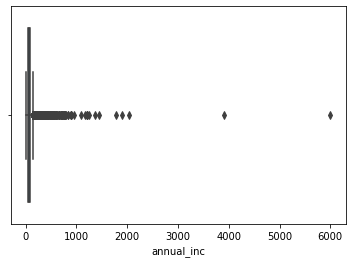

In [94]:
sns.boxplot(loan['annual_inc'])
plt.show()

In [95]:
loan['annual_inc'].describe()

count    38577.000000
mean        68.777974
std         64.218682
min          4.000000
25%         40.000000
50%         58.868000
75%         82.000000
max       6000.000000
Name: annual_inc, dtype: float64

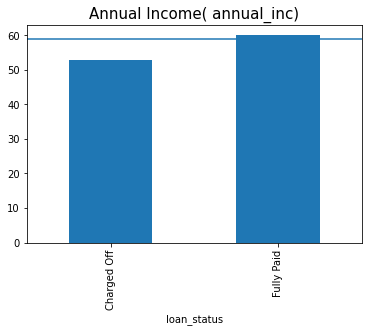

In [96]:
# As we found the presence of outliers, so we are considering median plot.
loan.groupby(['loan_status'])['annual_inc'].median().plot.bar()
plt.axhline(y=59)
plt.title('''Annual Income( annual_inc)''', fontsize=15)
plt.show()

* #### From the Above analysis, it is clear than Borrowers having Annual Income less than 59K USD are Most likely to Default.

In [97]:
# understanding the Feature 'verification_status'
# 'verification_status': Indicates if income was verified by LC, not verified, or if the income source was verified
loan['verification_status'].sample(5)

25917       Not Verified
19763           Verified
27516           Verified
23194    Source Verified
30165    Source Verified
Name: verification_status, dtype: object

In [98]:
(loan.groupby(['verification_status'])['loan_status'].value_counts(normalize=True))*100

verification_status  loan_status
Not Verified         Fully Paid     87.169043
                     Charged Off    12.830957
Source Verified      Fully Paid     85.181358
                     Charged Off    14.818642
Verified             Fully Paid     83.196788
                     Charged Off    16.803212
Name: loan_status, dtype: float64

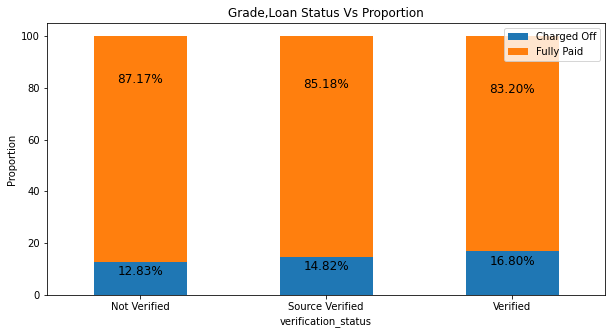

In [113]:
plots=loan.groupby('verification_status')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=0)
plt.ylabel("Proportion")
plt.legend(loc='upper right')
plt.title("Grade,Loan Status Vs Proportion")
plt.xlabel('verification_status')
plt.show()

* #### It is really surprising to see that Borrowers who's Income Source are not Verified are most likely to Fully Pay where as the Borrowers having a verfied income are most like Charged Off.

In [100]:
# Understanding Feature 'dti'
# 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations,
# excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
loan['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

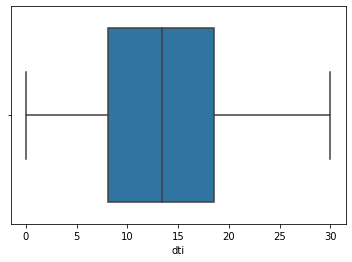

In [101]:
sns.boxplot(loan['dti'])
plt.show()

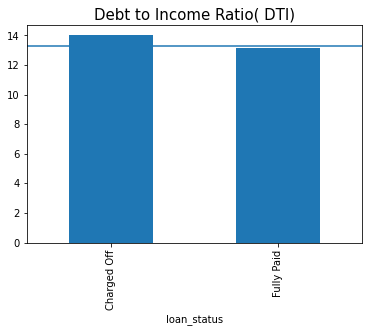

In [102]:
# As there are no oulier in the DTI Feature so we can consider a mean plot.
loan.groupby(['loan_status'])['dti'].mean().plot.bar()
plt.axhline(y=13.27)
plt.title('''Debt to Income Ratio( DTI)''', fontsize=15)
plt.show()

* #### If the DTI Ratio is more than 13.27 then Borrowers are most likely to Default.

In [103]:
# Understanding the feature 'issue_d'
# 'issue_d':The month which the loan was funded
loan['issue_d'].sample(5)

28266    Jul-10
30579    Apr-10
19766    Feb-11
25436    Sep-10
20019    Feb-11
Name: issue_d, dtype: object

In [104]:
loan[['Issue_Month','Issue_Year']]=loan['issue_d'].str.split('-',expand=True)

In [105]:
loan['Issue_Year'].value_counts(normalize=True)*100

11    53.181948
10    29.893460
09    12.224901
08     4.049045
07     0.650647
Name: Issue_Year, dtype: float64

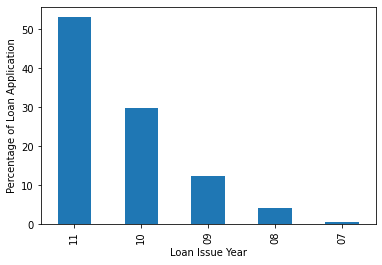

In [106]:
loan_year=loan['Issue_Year'].value_counts(normalize=True)*100
loan_year.plot.bar()
plt.xlabel('Loan Issue Year')
plt.ylabel('Percentage of Loan Application')
plt.show()


In [107]:
loan.groupby(['loan_status'])['Issue_Year'].value_counts()

loan_status  Issue_Year
Charged Off  11             3256
             10             1485
             09              594
             08              247
             07               45
Fully Paid   11            17260
             10            10047
             09             4122
             08             1315
             07              206
Name: Issue_Year, dtype: int64

In [108]:
loan.groupby(['loan_status'])['Issue_Month'].value_counts()

loan_status  Issue_Month
Charged Off  Dec             678
             Nov             598
             Oct             580
             Sep             547
             Jun             483
             Jul             479
             Aug             468
             May             466
             Apr             370
             Mar             347
             Jan             321
             Feb             290
Fully Paid   Dec            3537
             Nov            3408
             Oct            3181
             Sep            2951
             Aug            2920
             Jul            2872
             Jun            2697
             Apr            2461
             May            2453
             Mar            2344
             Feb            2068
             Jan            2058
Name: Issue_Month, dtype: int64

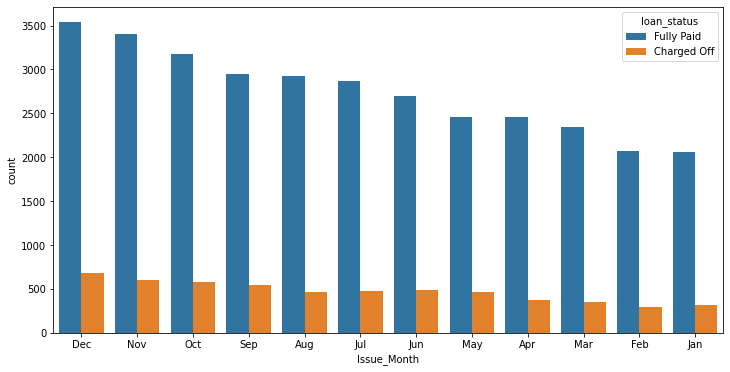

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='Issue_Month',hue='loan_status')
plt.show()

* #### Most of the Applicant has been issued the Loan in the December Month.

In [110]:
loan['loan_status_Numerical']=loan['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)
loan.sample(5)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,Issue_Month,Issue_Year,loan_status_Numerical
7836,10000,36 months,5.42,A,8 years,MORTGAGE,55.0,Source Verified,Sep-11,Fully Paid,n,debt_consolidation,Debt Consolidation,9.53,Sep,11,0
15141,26500,60 months,15.99,D,10+ years,MORTGAGE,78.0,Verified,May-11,Charged Off,n,debt_consolidation,Credit card consolidation,27.45,May,11,1
36640,5500,36 months,12.21,B,4 years,RENT,34.0,Not Verified,May-09,Fully Paid,n,medical,Surgery Expenses,18.00,May,09,0
20643,12000,36 months,6.92,A,4 years,RENT,61.0,Not Verified,Jan-11,Fully Paid,n,debt_consolidation,personal debt,11.23,Jan,11,0
25470,24250,60 months,16.45,E,8 years,RENT,60.0,Verified,Sep-10,Charged Off,n,small_business,Business,10.94,Sep,10,1


In [111]:
loan.describe()

,loan_amnt,int_rate,annual_inc,dti,loan_status_Numerical
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,11.932219,68.777974,13.272727,0.145864
std,7348.441646,3.691327,64.218682,6.673044,0.352975
min,500.000000,5.420000,4.000000,0.000000,0.000000
25%,5300.000000,8.940000,40.000000,8.130000,0.000000
50%,9600.000000,11.710000,58.868000,13.370000,0.000000
75%,15000.000000,14.380000,82.000000,18.560000,0.000000
max,35000.000000,24.400000,6000.000000,29.990000,1.000000


* #### Around 14.6% Borrower got defaulted who's average annual income is below 59K USD for the average loan amount of around 11K USD. Hence Lending Club should check before approving such kind of Loan profile.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------